# Cross Validation Lab

In this lab I am going to use the mtcars dataset as an example that is done out for you. You are to read this, try running the cells and understand what is going on in them. Get the logic behind the things I've tried

1) Looking at train_test_split and comparing training scores to test scores.
2) Getting cross validation scores to make a selection on which features to use.
3) Trying Polynomial Regression on a variable to see if it can improve things.

After this, I want you to repeat the procedure with the Diabetes dataset

First of all, let's look at last week's mtcars dataset and see what we can do with that
I said to try more than one feature and see if that improved the model, but the scores we used were not actually that reliable. We should be using separate sets for training and evaluating so let's try that now and see what happens

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#load mtcars
dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


y is the response variable so let's slice that off

In [5]:
y = dfcars['mpg']

We have multiple possible X's let's put them aside too, we don't want the first two columns

In [11]:
allX = dfcars.iloc[:, 2:]

In [13]:
allX.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


We first of all need to separate the data into a training set and a test set. We can use train_test_split for this

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
allX_train, allX_test, y_train, y_test = train_test_split(allX, y, test_size=0.2, random_state=42)

I did random_state=42 so the answer is the same everytime I run this workbook.

Ok now we have two different datasets, train and test that we can use where appropriate. First of all, we just want to try different features

I think wt would be a good feature to select so I'll go with that

Separating out just that column into what we are going to fit

In [25]:
X_train = allX_train[["wt"]]
X_test = allX_test[["wt"]]

Now build the model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

Let's look at the scores of both the training set and test set

In [30]:
model1.score(X_train, y_train)

0.7701379909791616

In [31]:
model1.score(X_test, y_test)

0.6879761857596277

There is a decent difference between the scores so maybe overfit a little. Anyway let's try a different feature

In [32]:
X_train = allX_train[["hp"]]
X_test = allX_test[["hp"]]

In [33]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [34]:
model2.score(X_train, y_train)

0.6504157759912871

In [35]:
model2.score(X_test, y_test)

0.3996010170101506

Ok hp is even worse performing than wt. Not a good one to use

drat?

In [36]:
X_train = allX_train[["drat"]]
X_test = allX_test[["drat"]]

In [37]:
model3 = LinearRegression()
model3.fit(X_train, y_train)

LinearRegression()

In [38]:
model3.score(X_train, y_train)

0.45889832481878434

In [39]:
model3.score(X_test, y_test)

0.4652147268834994

The best I tried was wt, the first one. Anyway let's try two variables

In [40]:
X_train = allX_train[["wt","hp"]]
X_test = allX_test[["wt","hp"]]

In [41]:
model4 = LinearRegression()
model4.fit(X_train, y_train)

LinearRegression()

In [42]:
model4.score(X_train, y_train)

0.8321502526033073

That is a better training score, but what about the test score which is really what's important

In [43]:
model4.score(X_test, y_test)

0.7880448439485955

That's the best we've had so far, so model4 is the best one of that

## Validation
Hold on, I've contradicted a little what I said in the "lecture". I'm using the test score to make decisions. I should not be doing this. I should use some form of validation. So here's an example of that

In [44]:
from sklearn.model_selection import cross_val_score

In [46]:
cross_val_score?

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

scoring : str or callable, default=None

In [49]:
scores.mean()

0.6332786406507418

Let's try wt again

In [50]:
X_train = allX_train[["wt"]]
X_test = allX_test[["wt"]]

In [51]:
model5 = LinearRegression()
scores = cross_val_score(model5, X_train, y_train)
scores

array([0.10736385, 0.49488149, 0.86879651, 0.65179584, 0.73272638])

In [52]:
scores.mean()

0.571112815468978

Now let's try the two variables, wt and hp again

In [53]:
X_train = allX_train[["wt","hp"]]
X_test = allX_test[["wt","hp"]]

In [54]:
model6 = LinearRegression()
scores6 = cross_val_score(model5, X_train, y_train)
scores6

array([0.1262545 , 0.6744817 , 0.76712479, 0.76448681, 0.83404541])

In [55]:
scores6.mean()

0.6332786406507418

So the two together has a higher cross validation score that just one. This means we should select the two variables over one 

What about 3? Let's try drat

In [61]:
X_train = allX_train[["wt","hp","drat"]]
X_test = allX_test[["wt","hp","drat"]]

In [62]:
model7 = LinearRegression()
scores7 = cross_val_score(model5, X_train, y_train)
scores7.mean()

0.6571279909053496

Slightly better than 2. It is not always the case that more features the better, just happened in the above example

Let's try three features again, but this time with carb instead of drat

In [69]:
X_train = allX_train[["wt","hp","carb"]]
X_test = allX_test[["wt","hp","carb"]]

In [70]:
model8 = LinearRegression()
scores8 = cross_val_score(model5, X_train, y_train)
scores8.mean()

0.6036599344425264

This score is worse than only using the two features wt and hp

Our best so far (according to the cross val scores) has been model7, the one with ["wt","hp","drat"]. So let's build that model fully and then evaluate that

In [71]:
X_train = allX_train[["wt","hp","drat"]]
X_test = allX_test[["wt","hp","drat"]]
model7 = LinearRegression()
model7.fit(X_train, y_train)
model7.score(X_test, y_test)

0.79004928438052

A score of .79 for the test set

## Polynomial Regression Example

I am going to use the 'wt' as a feature and see what happens with a polynomial regression model

Some notes about Polynomial and sklearn

### The `scikit-learn` interface

Scikit-learn is the main python machine learning library. It consists of many learners which can learn models from data, as well as a lot of utility functions such as `train_test_split`. It can be used in python by the incantation `import sklearn`.

The library has a very well defined interface. This makes the library a joy to use, and surely contributes to its popularity. As the [scikit-learn API paper](http://arxiv.org/pdf/1309.0238v1.pdf) [Buitinck, Lars, et al. "API design for machine learning software: experiences from the scikit-learn project." arXiv preprint arXiv:1309.0238 (2013).] says:

>All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces: **an estimator interface for building and ﬁtting models, a predictor interface for making predictions and a transformer interface for converting data**. The estimator interface is at the core of the library. It deﬁnes instantiation mechanisms of objects and exposes a `fit` method for learning a model from training data. All supervised and unsupervised learning algorithms (e.g., for classiﬁcation, regression or clustering) are oﬀered as objects implementing this interface. Machine learning tasks like feature extraction, feature selection or dimensionality reduction are also provided as estimators.

We'll use the "estimator" interface here, specifically the estimator `PolynomialFeatures`. The API paper again:

>Since it is common to modify or ﬁlter data before feeding it to a learning algorithm, some estimators in the library implement a transformer interface which deﬁnes a transform method. It takes as input some new data X and yields as output a transformed version of X. Preprocessing, feature selection, feature extraction and dimensionality reduction algorithms are all provided as transformers within the library.

To start with we have one **feature** `x` to predict `y`, what we will do is the transformation:

$$ x \rightarrow 1, x, x^2, x^3, ..., x^d $$

for some power $d$. Our job then is to **fit** for the coefficients of these features in the polynomial

$$ a_0 + a_1 x + a_2 x^2 + ... + a_d x^d. $$

In other words, we have transformed a function of one feature, into a (rather simple) **linear** function of many features. To do this we first construct the estimator as `PolynomialFeatures(d)`, and then transform these features into a d-dimensional space using the method `fit_transform`.

![fit_transform](images/sklearntrans.jpg)

Here is an example. The reason for using `[[1],[2],[3]]` as opposed to `[1,2,3]` is that scikit-learn expects data to be stored in a two-dimensional array or matrix with size `[n_samples, n_features]`.

To transform `[1,2,3]` into [[1],[2],[3]] we need to do a reshape.

![reshape](images/reshape.jpg)

In [77]:
demo = np.array([1,2,3]).reshape(-1,1)
demo

array([[1],
       [2],
       [3]])

In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
PolynomialFeatures(5).fit_transform(demo)

array([[  1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.,  32.],
       [  1.,   3.,   9.,  27.,  81., 243.]])

This is $x^0 , x^1, x^2, x^3, x^4, x^5$

We don't actually want that first column of ones if we are going to use sklearn.LinearRegression as it will give us two intercepts so actually do

In [81]:
PolynomialFeatures(5, include_bias=False).fit_transform(demo)

array([[  1.,   1.,   1.,   1.,   1.],
       [  2.,   4.,   8.,  16.,  32.],
       [  3.,   9.,  27.,  81., 243.]])

Which is now $x^1, x^2, x^3, x^4, x^5$

In [76]:
X_train = allX_train[["wt"]]
X_test = allX_test[["wt"]]

Let's try it with PolynomialFeatures(2)

In [82]:
X_train_poly = PolynomialFeatures(2, include_bias=False).fit_transform(X_train)
X_test_poly = PolynomialFeatures(2, include_bias=False).fit_transform(X_test)

In [84]:
modelpoly2 = LinearRegression()
modelpoly2.fit(X_train_poly, y_train)

LinearRegression()

In [86]:
print(modelpoly2.score(X_train_poly, y_train))
print(modelpoly2.score(X_test_poly, y_test))

0.8548475030225509
0.6821839404663562


Let's now do a loop for more of them and record all the scores in an array

We will initialise the array as all zeros

In [106]:
from sklearn.metrics import mean_squared_error

In [107]:
max_p = 10
degrees = range(max_p+1)
train_scores = np.zeros(max_p+1)
test_scores = np.zeros(max_p+1)
error_train = np.zeros(max_p+1)
error_test = np.zeros(max_p+1)

In [110]:
for i in degrees:
    if i != 0:
        X_train_poly = PolynomialFeatures(i, include_bias=False).fit_transform(X_train)
        X_test_poly = PolynomialFeatures(i, include_bias=False).fit_transform(X_test)
        polymodel = LinearRegression()
        polymodel.fit(X_train_poly, y_train)
        prediction_on_training = polymodel.predict(X_train_poly)
        prediction_on_test = polymodel.predict(X_test_poly)
        error_train[i] = mean_squared_error(y_train, prediction_on_training)
        error_test[i] = mean_squared_error(y_test, prediction_on_test)
        train_scores[i] = polymodel.score(X_train_poly, y_train)
        test_scores[i] = polymodel.score(X_test_poly, y_test)

In [111]:
train_scores

array([0.        , 0.77013799, 0.8548475 , 0.85493705, 0.85535746,
       0.86830004, 0.87003984, 0.9023398 , 0.91029886, 0.91151736,
       0.91162721])

Now let's look at plots and things. I am going to keep doing error_train[1:], error_test[1:] so the 0 value is not counted

This will give us the degree with the lowest error in the test set

In [120]:
bestd = np.argmin(error_test[1:])+1

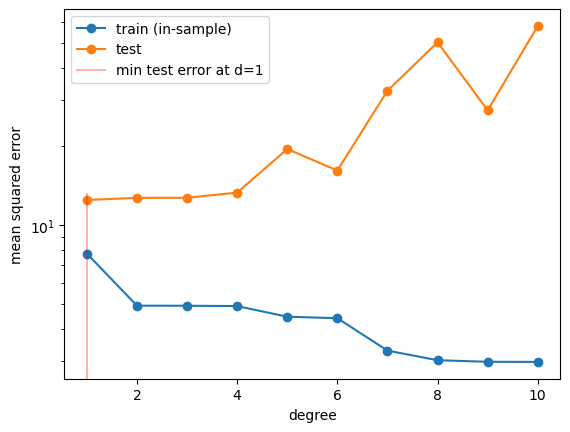

In [123]:
plt.plot(degrees[1:], error_train[1:], marker='o', label='train (in-sample)')
plt.plot(degrees[1:], error_test[1:], marker='o', label='test')
plt.axvline(bestd, 0,0.5, color='r', label="min test error at d=%d"%bestd, alpha=0.3)
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")

So the simple linear regression $y = w_0 + w_1x$ works best for wt

Notice how the training error keeps getting smaller as the degree increases, but this does not correspond to a better test error

This is expected if we looked at the scatter plot of wt vs mpg

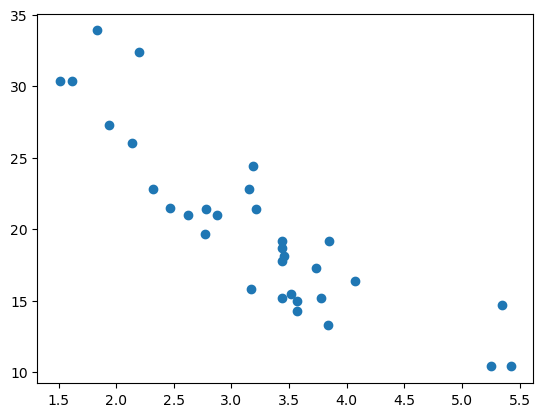

In [125]:
plt.scatter(dfcars["wt"],dfcars["mpg"])

Relationship looks linear

## Some work for you to do

In [32]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()
# print(diabetes.DESCR)
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


## Do similar to what I've done with the diabetes dataset

See if you can find a better combination of columns rather than using all of them

Pick one variable and see if a Polynomial Regression model could improve that one variable

In [64]:
y = diabetes.target
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [569]:
allX = df
allX.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [570]:
allX_train, allX_test, y_train, y_test = train_test_split(allX, y, test_size=0.2, random_state=42)

In [608]:
#X_train = allX_train[["sex", "bmi", "bp", "s1", "s4", "s5"]]
#X_test = allX_test[["sex", "bmi", "bp", "s1", "s4", "s5"]]
X_train = allX_train[["bmi"]]
X_test = allX_test[["bmi"]]
#"sex", "bmi", "bp", "s1", "s4", "s5"

In [609]:
from sklearn.linear_model import LinearRegression

In [610]:
model1 = LinearRegression()
#model1.fit(X_train, y_train)

In [611]:
#model1.score(X_train, y_train)

In [612]:
#model1.score(X_test, y_test)

In [613]:
from sklearn.model_selection import cross_val_score

In [614]:
scores = cross_val_score(model1, X_train, y_train)
scores

array([0.3567854 , 0.20353585, 0.37435698, 0.49312604, 0.1820502 ])

In [615]:
scores.mean()

0.3219708944671108

In [616]:
from sklearn.preprocessing import PolynomialFeatures

In [617]:
X_train_poly = PolynomialFeatures(2, include_bias=False).fit_transform(X_train)
X_test_poly = PolynomialFeatures(2, include_bias=False).fit_transform(X_test)

In [618]:
modelpoly2 = LinearRegression()
modelpoly2.fit(X_train_poly, y_train)

LinearRegression()

In [619]:
print(modelpoly2.score(X_train_poly, y_train))
print(modelpoly2.score(X_test_poly, y_test))

0.36651069841284867
0.2289715971205668


In [620]:
from sklearn.metrics import mean_squared_error

In [621]:
max_p = 10
degrees = range(max_p+1)
train_scores = np.zeros(max_p+1)
test_scores = np.zeros(max_p+1)
error_train = np.zeros(max_p+1)
error_test = np.zeros(max_p+1)

In [622]:
for i in degrees:
    if i != 0:
        X_train_poly = PolynomialFeatures(i, include_bias=False).fit_transform(X_train)
        X_test_poly = PolynomialFeatures(i, include_bias=False).fit_transform(X_test)
        polymodel = LinearRegression()
        polymodel.fit(X_train_poly, y_train)
        prediction_on_training = polymodel.predict(X_train_poly)
        prediction_on_test = polymodel.predict(X_test_poly)
        error_train[i] = mean_squared_error(y_train, prediction_on_training)
        error_test[i] = mean_squared_error(y_test, prediction_on_test)
        train_scores[i] = polymodel.score(X_train_poly, y_train)
        test_scores[i] = polymodel.score(X_test_poly, y_test)

In [623]:
test_scores

array([ 0.        ,  0.2333504 ,  0.2289716 ,  0.23285637,  0.20233601,
        0.22881681,  0.24887471,  0.20857339, -0.4864274 , -0.35997024,
        0.18546443])

In [624]:
train_scores

array([0.        , 0.36572413, 0.3665107 , 0.36665649, 0.36951839,
       0.37071867, 0.37211035, 0.37399415, 0.38530144, 0.38534538,
       0.38703609])